In [1]:
import pandas as pd
import os
import sys
import seaborn as sns


import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utilities.constants import PRETTY_NAMES

In [2]:
import json

models = [
    'basic_model',
    'last_hidden_state_model',
    'token_statistics_model',
    'full_dec_model',
    'full_dec_no_stat_model',
    'comet_model',
    'full_dec_comet_model'
]
# Load all the results



def load_timings_models():
   
    results = {}
    models = [
        'basic_model',
        'last_hidden_state_model',
        'token_statistics_model',
        'full_dec_model',
        'full_dec_no_stat_model',
        'comet_model',
        'full_dec_comet_model'
    ]
    for model in models:
        base = '../results/{}/'.format(model)
        summary_ref = base + '/timing_result.json'
        with open(summary_ref, 'r') as f:
            summary = json.load(f)

            results[model] = summary["mean_time"]
    return results

timing_models = load_timings_models()


In [3]:
timing_models

{'basic_model': 0.0014542001058545232,
 'last_hidden_state_model': 0.016235920916361193,
 'token_statistics_model': 0.008109933413398124,
 'full_dec_model': 0.017101969971011426,
 'full_dec_no_stat_model': 0.02382522225874862,
 'comet_model': 0.051896765857002855,
 'full_dec_comet_model': 0.0755451023826103}

In [4]:

def load_timings_mc_estimate():
    results = {}
    for util in ['unigram-f1', 'chrf', 'COMET']:
        base = '../results/{}/'.format(util)
        summary_ref = base + 'm_estimation_timing_.json'
        with open(summary_ref, 'r') as f:
            summary = json.load(f)

            results[util] = summary
    return results

timings_mc_estimate = load_timings_mc_estimate()


In [5]:
timings_mc_estimate

{'unigram-f1': {'1': 0.00010140299170161758,
  '2': 0.00013074576607246727,
  '3': 0.00015919841361976283,
  '4': 0.0001824311922370579,
  '5': 0.00020620224385455545,
  '10': 0.0003209926400394477,
  '25': 0.000638401148690763,
  '50': 0.0011192591540740199,
  '100': 0.0020197228384981384},
 'chrf': {'1': 0.00010338121261617796,
  '2': 0.00018420702461519303,
  '3': 0.0002662640610395823,
  '4': 0.0003377570361600106,
  '5': 0.00041102584365857397,
  '10': 0.000788511017039975,
  '25': 0.0017985871977796854,
  '50': 0.003361601199992898,
  '100': 0.006289339778233921},
 'COMET': {'1': 0.030834071167017526,
  '2': 0.03128272959838242,
  '3': 0.03342578670439415,
  '4': 0.032685089071734674,
  '5': 0.03495936726322802,
  '10': 0.04212508939357138,
  '25': 0.06082851445282261,
  '50': 0.09162321408765652,
  '100': 0.1615356440825242}}

In [6]:
def load_timing_reference_generation():
    

    with open('../results/reference_generation.json', 'r') as f:
        summary = json.load(f)

    return summary
timing_reference_generation = load_timing_reference_generation()

In [7]:
timing_reference_generation

{'1': 0.03524648904800415,
 '2': 0.03471473614374797,
 '3': 0.03710593064626058,
 '4': 0.03679359992345174,
 '5': 0.03923253059387207,
 '10': 0.046412130196889244,
 '25': 0.05171272754669189,
 '50': 0.10294493595759074,
 '100': 0.1968046736717224,
 '1000': 1.719234013557434}

In [8]:
# Load the embedded reference timings
def load_timing_embedded_model():
    
    timings = []
    for i in range(5):
        with open('../results/unigram_count_model_{}/timing_result.json'.format(i + 1), 'r') as f:
            timing = json.load(f)
            timings.append(timing["mean_time"])
    return timings
timing_embedded_model = load_timing_embedded_model()


In [9]:
timing_embedded_model

[0.0014965429287553329,
 0.0014974312078843907,
 0.001494895445155596,
 0.0014930510501138332,
 0.0015108580738429774]

In [10]:
# Calculate mc generation time
ms=[1,2,3,4,5,10,25, 50, 100]
utilities = [
    'unigram-f1',
    'chrf',
    'COMET'
]
mc_estimate_timing = {}
mc_estimate_timing_no_ref = {}
for util in utilities:
    mc_estimate_timing[util] = [timing_reference_generation[str(m)] +  timings_mc_estimate[util][str(m)] for m in ms ]
    mc_estimate_timing_no_ref[util] = [timings_mc_estimate[util][str(m)] for m in ms ]


In [11]:
mc_estimate_timing

{'unigram-f1': [0.035347892039705765,
  0.03484548190982043,
  0.037265129059880345,
  0.0369760311156888,
  0.03943873283772663,
  0.046733122836928695,
  0.05235112869538266,
  0.10406419511166476,
  0.19882439651022055],
 'chrf': [0.03534987026062033,
  0.03489894316836316,
  0.03737219470730017,
  0.037131356959611755,
  0.03964355643753065,
  0.047200641213929216,
  0.05351131474447158,
  0.10630653715758365,
  0.20309401344995634],
 'COMET': [0.06608056021502168,
  0.06599746574213039,
  0.07053171735065474,
  0.06947868899518642,
  0.07419189785710009,
  0.08853721959046063,
  0.11254124199951451,
  0.19456815004524725,
  0.3583403177542466]}

In [12]:
basic_ref_model_timings = []

(0.6392156862745098, 0.6392156862745098, 0.6392156862745098)
(1.0, 0.7686274509803922, 0.0)
(0.0, 0.8431372549019608, 1.0)


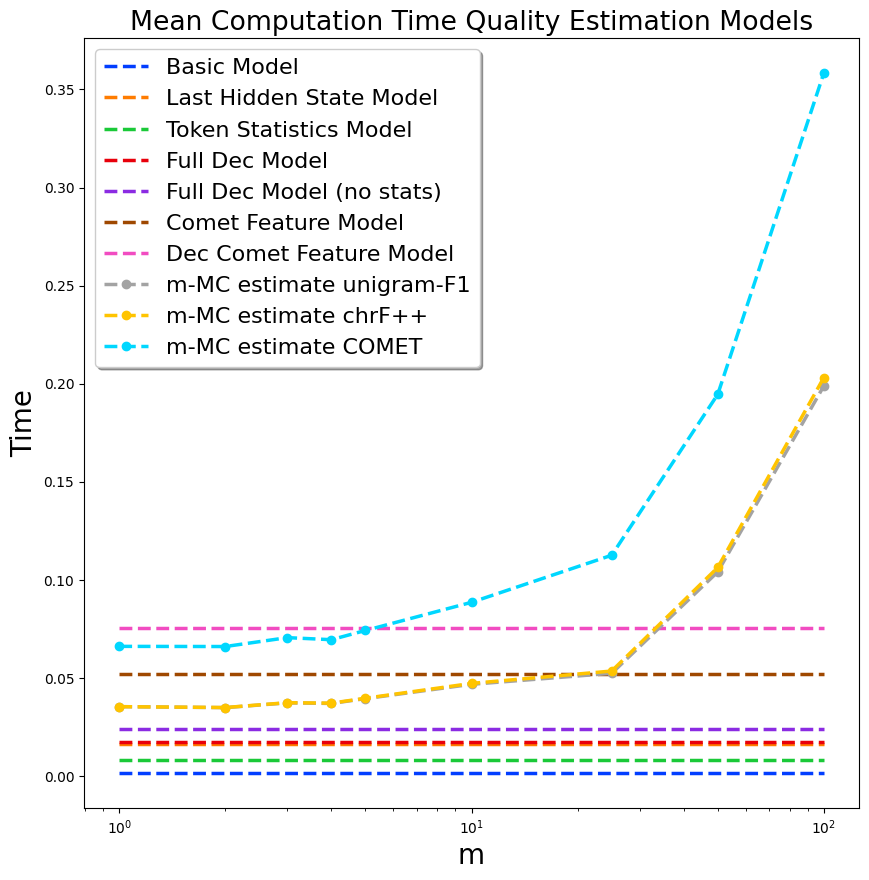

In [13]:
### Create a figure for utilities
import itertools


fig, (ax) = plt.subplots(1, figsize=(10,10))





names = [PRETTY_NAMES[name] for name in models]


### HERE we gather the statistics


# results_basic_reference_model = load_result_basic_ref_model_estimate(utility=utility[0])

# Get the results for the basic ref model


#### HERE we show the results
color_palette = itertools.cycle(sns.color_palette('bright'))
plt.rcParams.update({'font.size': 16})

lines = ['--', '-.', '-', ':',  '-.', '-', ':', '--', '-.', '-', ':']

lw=2.5

time_models = [timing_models[model] for model in models]
for line, name, stat in zip(lines, names, time_models):
    color = next(color_palette)

    ax.plot(ms, [stat] * 9, '--', label=name, color = color, lw=lw)
ax.set_xscale('log')

UTILITY_NAMES = {
    'unigram-f1': 'unigram-F1',
    'chrf': 'chrF++',
    'COMET': 'COMET',
}

for util in utilities:
    color = next(color_palette)
    print(color)
    ax.plot(ms, mc_estimate_timing[util], '--o', label='m-MC estimate {}'.format(UTILITY_NAMES[util]), lw=lw, color=color)
    
    
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend( shadow=True, ncol=1)
plt.title("Mean Computation Time Quality Estimation Models" )
ax.set_xlabel('m',  size=20)
ax.set_ylabel('Time' ,  size=20)
plt.show()

In [14]:
# Compute the computation time of the basic reference models
basic_ref_models_timing =  {}
for util in utilities:
    basic_ref_models_timing[util] = [ timing_models["full_dec_model"] +  mc_estimate_timing[util][i] for i in range(len(ms)) ]


In [15]:
# Compute the timing for 
embed_timings =  {}
for util in utilities:
    embed_timings[util] = [ timing_embedded_model[i] +  mc_estimate_timing[util][i] for i in range(5) ]


In [16]:
embed_timings

{'unigram-f1': [0.0368444349684611,
  0.03634291311770482,
  0.03876002450503594,
  0.03846908216580263,
  0.040949590911569606],
 'chrf': [0.03684641318937566,
  0.03639637437624755,
  0.03886709015245576,
  0.03862440800972559,
  0.041154414511373624],
 'COMET': [0.067577103143777,
  0.06749489695001479,
  0.07202661279581032,
  0.07097174004530026,
  0.07570275593094307]}

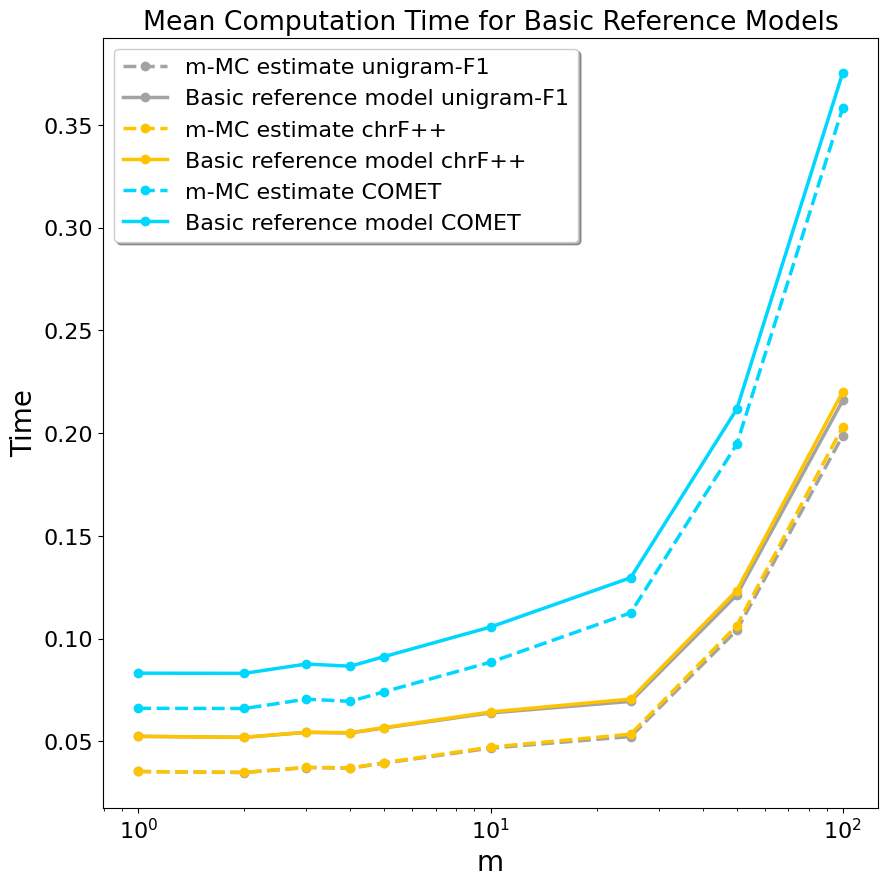

In [17]:
### Create a figure for utilities
import itertools


fig, (ax) = plt.subplots(1, figsize=(10,10))



names = [PRETTY_NAMES[name] for name in models]


### HERE we gather the statistics


# results_basic_reference_model = load_result_basic_ref_model_estimate(utility=utility[0])

# Get the results for the basic ref model


#### HERE we show the results
color_palette = itertools.cycle(sns.color_palette('bright'))
plt.rcParams.update({'font.size': 16})


ax.set_xscale('log')

UTILITY_NAMES = {
    'unigram-f1': 'unigram-F1',
    'chrf': 'chrF++',
    'COMET': 'COMET',
}

colors = [
    (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
    (1.0, 0.7686274509803922, 0.0),
    (0.0, 0.8431372549019608, 1.0),
]

for color, util in zip(colors,utilities):
    
    ax.plot(ms, mc_estimate_timing[util], '--o', label='m-MC estimate {}'.format(UTILITY_NAMES[util]), lw=lw, color=color)
    ax.plot(ms, basic_ref_models_timing[util], '-o', label='Basic reference model {}'.format(UTILITY_NAMES[util]), lw=lw, color=color)
    
    #ax.plot([1,2,3,4,5], embed_timings[util], '-x', label='Basic reference model {}'.format(UTILITY_NAMES[util]), lw=lw, color=color)

    
    
    
    
#lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend( shadow=True, ncol=1)
plt.title("Mean Computation Time for Basic Reference Models")
ax.set_xlabel('m',  size=20)
ax.set_ylabel('Time' ,  size=20)

plt.show()

In [33]:
## Running time vs models

import json
utility = 'COMET'

models = [
    'basic_model',
    'last_hidden_state_model',
    'token_statistics_model',
    'full_dec_model',
    'full_dec_no_stat_model',
    'comet_model',
    'full_dec_comet_model'
]


ms = [
    1,2,3,4,5,10,25,50, 100
]



def load_results_models(models, utility='unigram-f1'):
    base = '../results/{}/'.format(utility)
    results = {}
    for model in models:
        summary_ref = base + model + '/summary.json'
        with open(summary_ref, 'r') as f:
            summary = json.load(f)

            results[model] = summary
    return results

def load_result_m_mc_estimate(utility='unigram-f1'):
    base = '../results/{}/'.format(utility)
    results = {}
    for m in ms:
        summary_ref = base + '{}_mc_estimate/summary.json'.format(m)
        print()
        with open(summary_ref, 'r') as f:
            summary = json.load(f)

            results[m] = summary
    return results

def load_result_basic_ref_model_estimate(utility='unigram-f1'):
    base = '../results/{}/'.format(utility)
    results = {}
    for m in ms:
        summary_ref = base + 'basic_reference_model_{}/summary.json'.format(m)
        with open(summary_ref, 'r') as f:
            summary = json.load(f)

            results[m] = summary
    return results

def load_result_unigram_model_estimate(utility='unigram-f1'):
    base = '../results/{}/'.format(utility)
    results = {}
    for m in [1,2,3,4,5]:
        summary_ref = base + 'unigram_count_model_{}/summary.json'.format(m)
        with open(summary_ref, 'r') as f:
            summary = json.load(f)

            results[m] = summary
    return results

In [22]:
mc_results = load_result_m_mc_estimate()

In [23]:
results = load_results_models(models, utility='unigram-f1')

In [24]:
results

{'basic_model': {'mean_kendall_taus': 0.3347248000537065,
  'median_kendall_taus': 0.34968020237044006,
  'std_kendall_taus': 0.3073799877257259,
  'MSE': 0.01272496245331171,
  'best_bleurt_mean': 0.1329161813288927,
  'best_bleurt_median': 0.37036794424057007,
  'best_bleurt_std': 0.811615098318486,
  'top_10_bleurt_mean': 0.30485951603651046,
  'top_10_bleurt_median': 0.5897226929664612,
  'top_10_bleurt_std': 0.7389764343755978,
  'top_10_unigram_f1_mean': 0.6624965029440176,
  'top_10_unigram_f1_median': 0.6666666666666666,
  'top_10_unigram_f1_std': 0.24406706848041418,
  'best_unigram_f1_mean': 0.6179111874546799,
  'best_unigram_f1_median': 0.6666666666666665,
  'best_unigram_f1_std': 0.2616358847797697},
 'last_hidden_state_model': {'mean_kendall_taus': 0.48372252046041775,
  'median_kendall_taus': 0.511478158987012,
  'std_kendall_taus': 0.2654044544287405,
  'MSE': 0.006805854739107853,
  'best_bleurt_mean': 0.3411247897326946,
  'best_bleurt_median': 0.6260628402233124,
  '

In [56]:
utilities = [
    ('unigram-f1', 'unigram-F1'),
    ('chrf', 'chrF++'),
    ('comet', 'COMET'),
]

def time_vs_stat(timing_models, mc_estimate_timing, models, statistic='best_bleurt_mean', title='', utilities=utilities, sharey=False, log_scale=False, ylabel="BLEURT"):
    fig, (axs) = plt.subplots(1, 3, figsize=(30,10), sharey=sharey)
    plt.rcParams.update({'font.size': 16})
    names = [PRETTY_NAMES[name] for name in models]
   
    
    axs[0].set_ylabel(ylabel ,  size=20)
    lw=2.5
    markersize = 10
    for i, util in enumerate(utilities):
        ax = axs[i]
        ax.set_title(util[1])
        
        if log_scale:
            ax.set_yscale('log')
        ax.set_xlabel('Computation Time',  size=20)

        model_results = load_results_models(models, utility=util[0])
        
        color_palette = itertools.cycle(sns.color_palette('bright'))
        
 
        time_models = [timing_models[model] for model in models]
        
        statistics = [model_results[model][statistic] for model in models]
        
        for line, name, model_time, stat in zip(lines, names, time_models, statistics):
            color = next(color_palette)

            ax.plot(model_time, stat, 'x', label=name, color = color, lw=lw,  markersize=markersize)
            
        # Show the mc estimates
        
           
        util_name = util[0]
        if util_name == "comet":
            util_name = "COMET"
            
        
        mc_results = load_result_m_mc_estimate(utility=util[0])
        mc_results_temp = [mc_results[m][statistic] for m in ms]
        color = next(color_palette)
        ax.plot(mc_estimate_timing[util_name], mc_results_temp, '--o', label='m-MC estimate (1, ..., 100)', lw=lw, color=color)
        
        

       
          # Get the results for the basic ref model
        results_basic_reference_model = load_result_basic_ref_model_estimate(utility=util[0])
        statistics_reference_model = [r[statistic] for _, r in results_basic_reference_model.items()]

        # Get the results for the basic ref model
        result_unigram_count_model = load_result_unigram_model_estimate(utility=util[0])
        statistics_unigram_count_model = [r[statistic] for _, r in result_unigram_count_model.items()]

        
        ax.plot(basic_ref_models_timing[util_name], statistics_reference_model, '--o',  label='Basic Reference Model (1, ..., 100)', lw=lw, color=next(color_palette))
        ax.plot(embed_timings[util_name], statistics_unigram_count_model, '--o',  label='Embedded Reference Model (1, ..., 5)', lw=lw, color=next(color_palette))
        
    lgd = ax.legend(loc='upper center', bbox_to_anchor=(-0.75, -.1), fancybox=True, shadow=True, ncol=5)
    fig.suptitle(title, fontsize=28)
    plt.show()





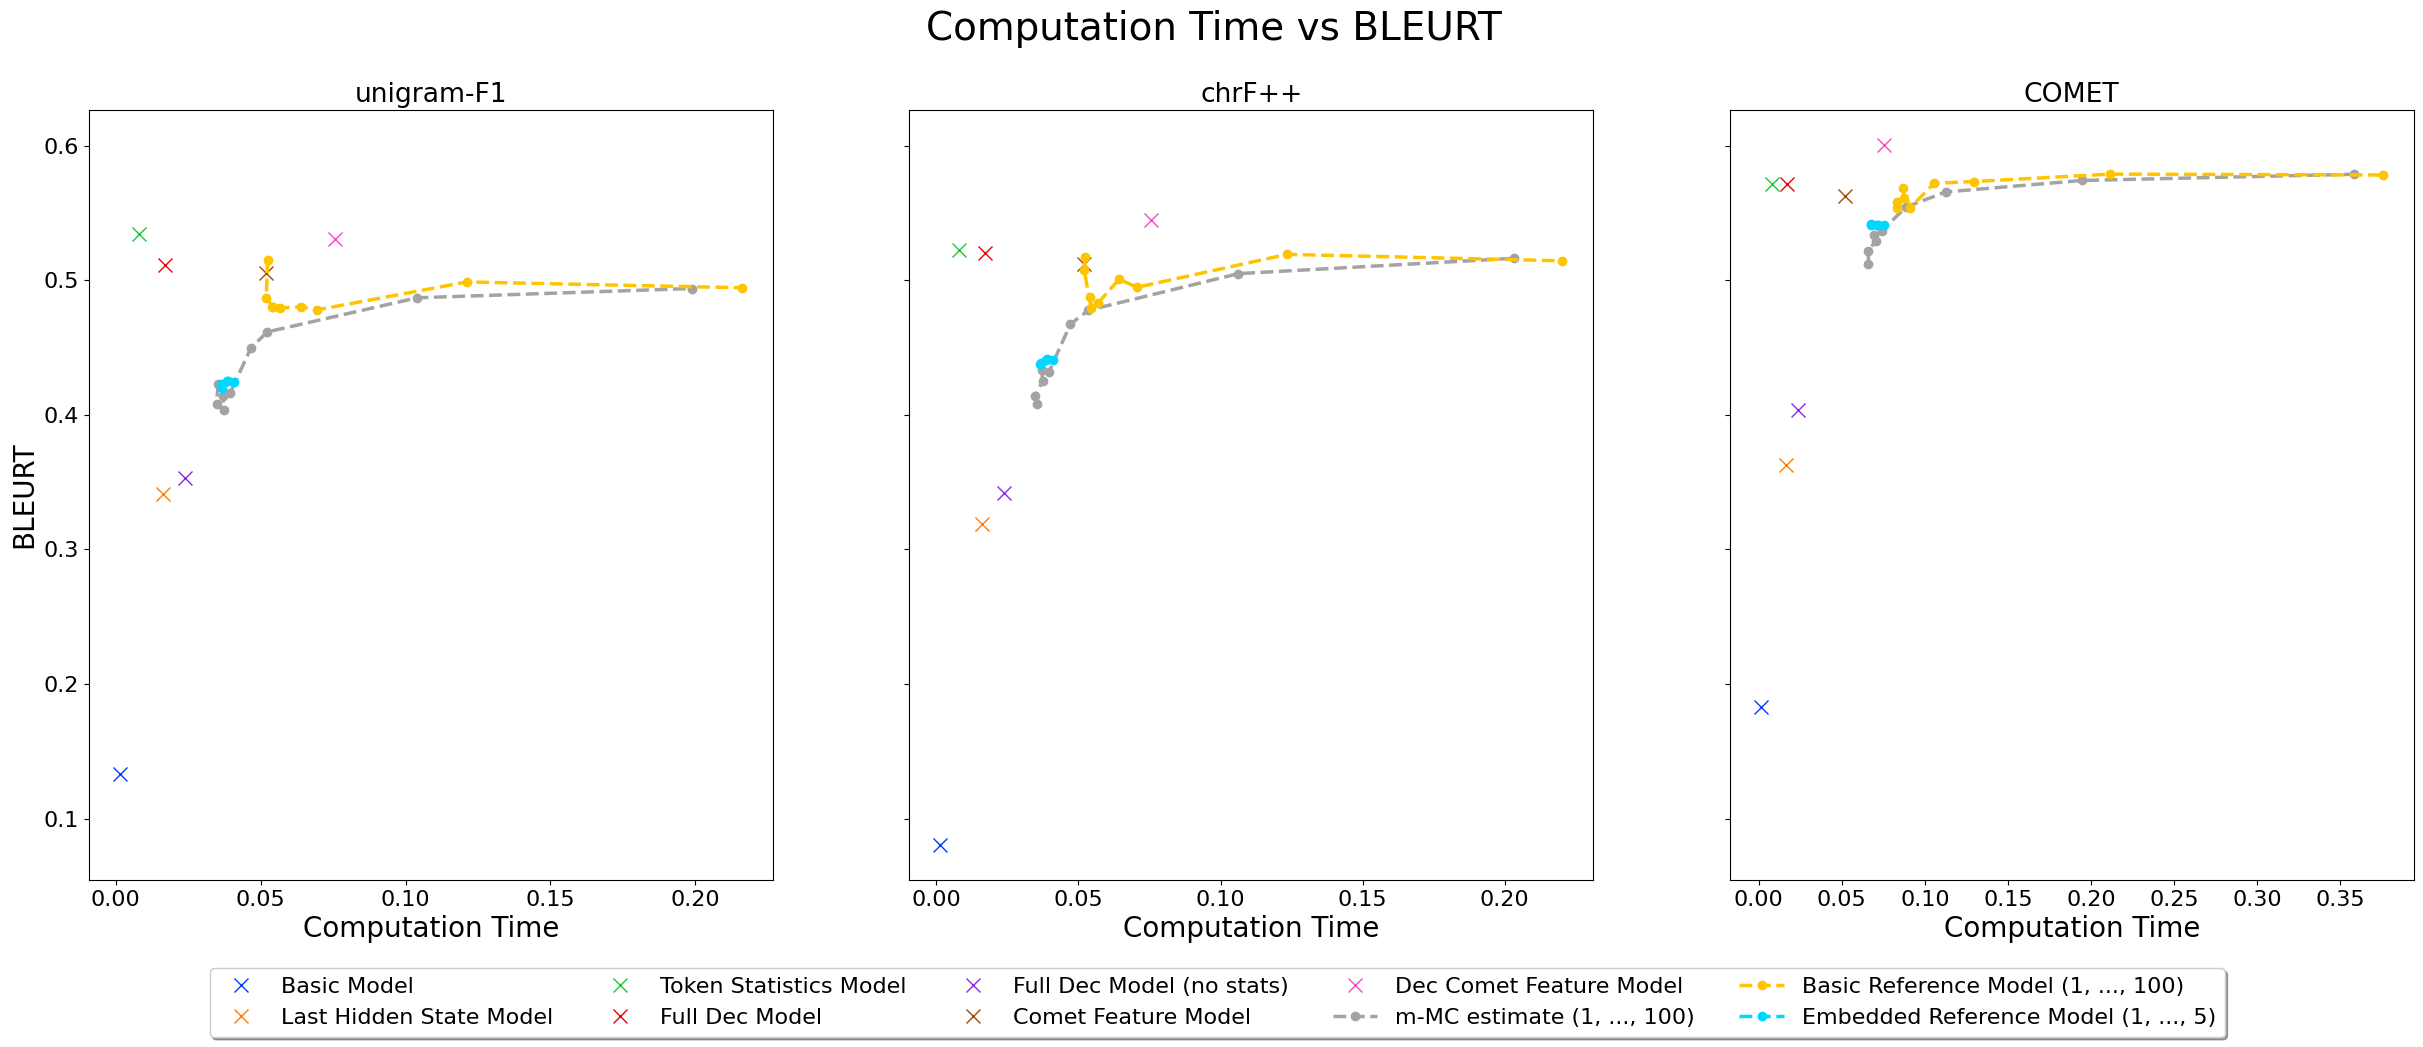

In [57]:
time_vs_stat(timing_models, mc_estimate_timing, models, title='Computation Time vs BLEURT', sharey=True)

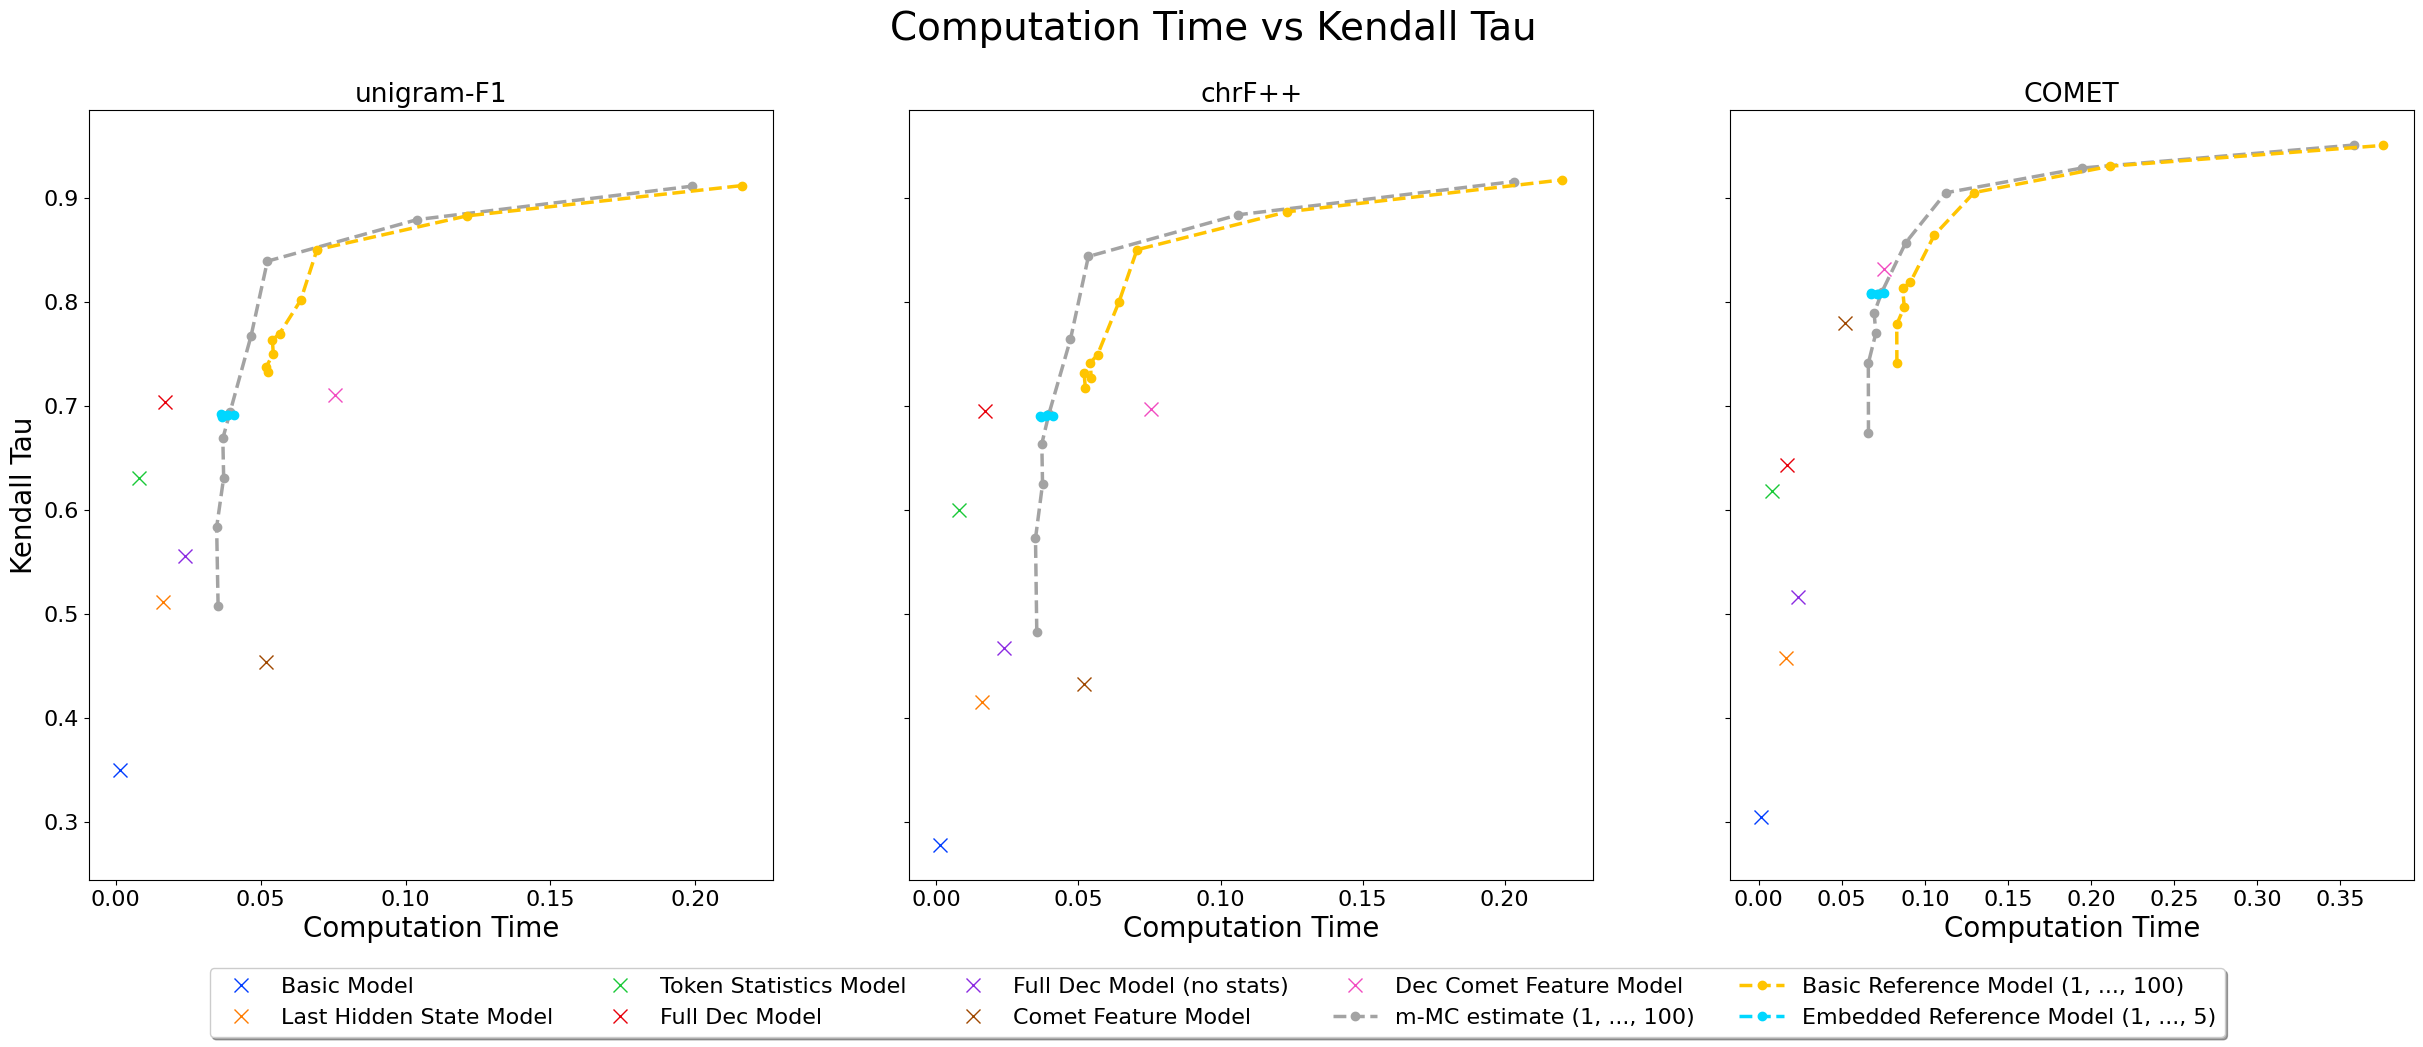

In [58]:
time_vs_stat(timing_models, mc_estimate_timing, models, statistic="median_kendall_taus", log_scale=False, sharey=True,  title='Computation Time vs Kendall Tau', ylabel='Kendall Tau')

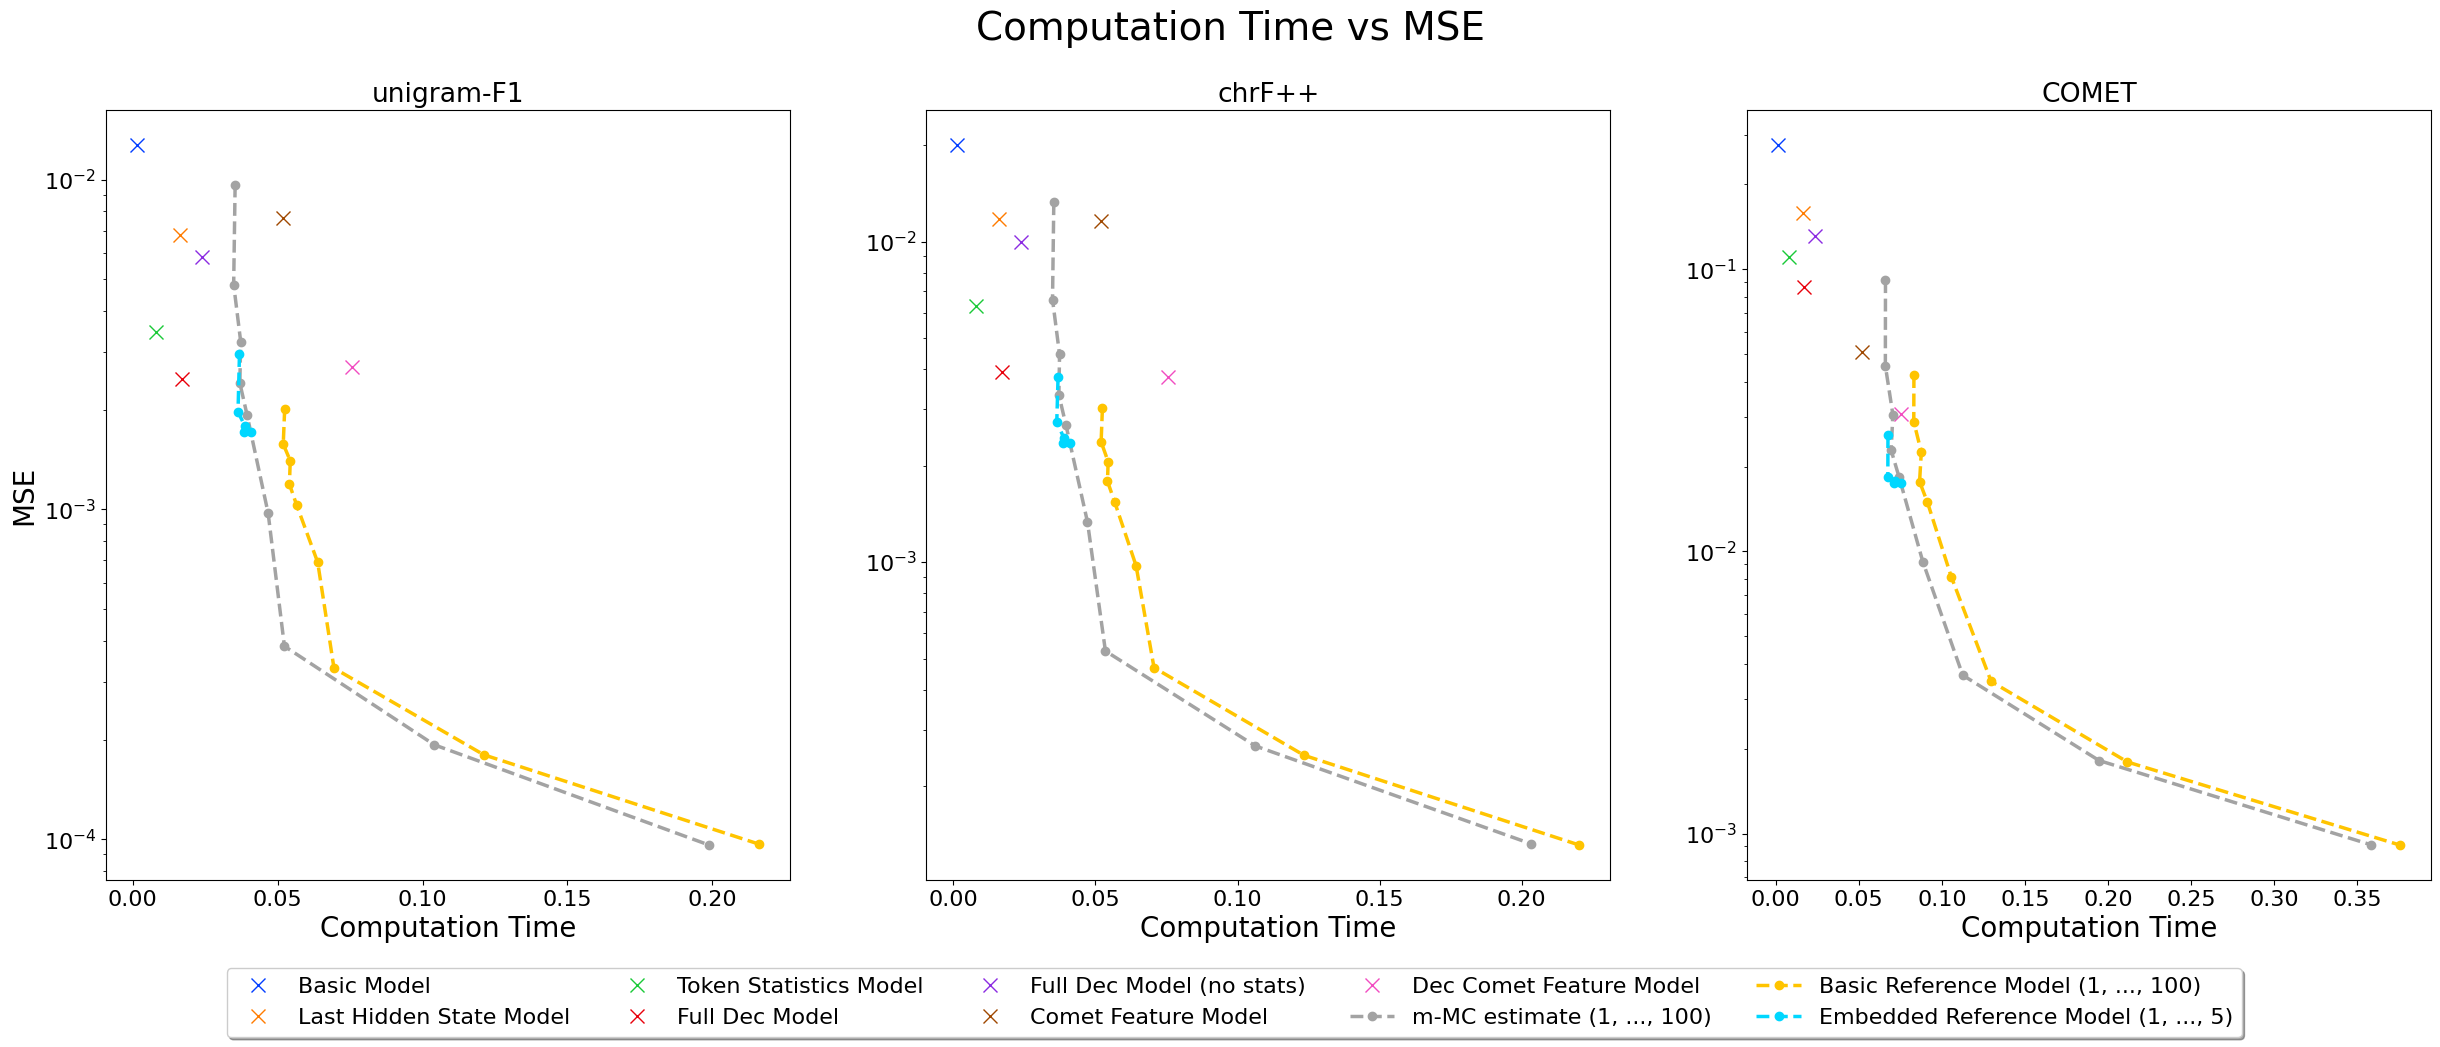

In [59]:
time_vs_stat(timing_models, mc_estimate_timing, models, statistic="MSE", log_scale=True, sharey=False, title='Computation Time vs MSE', ylabel='MSE')

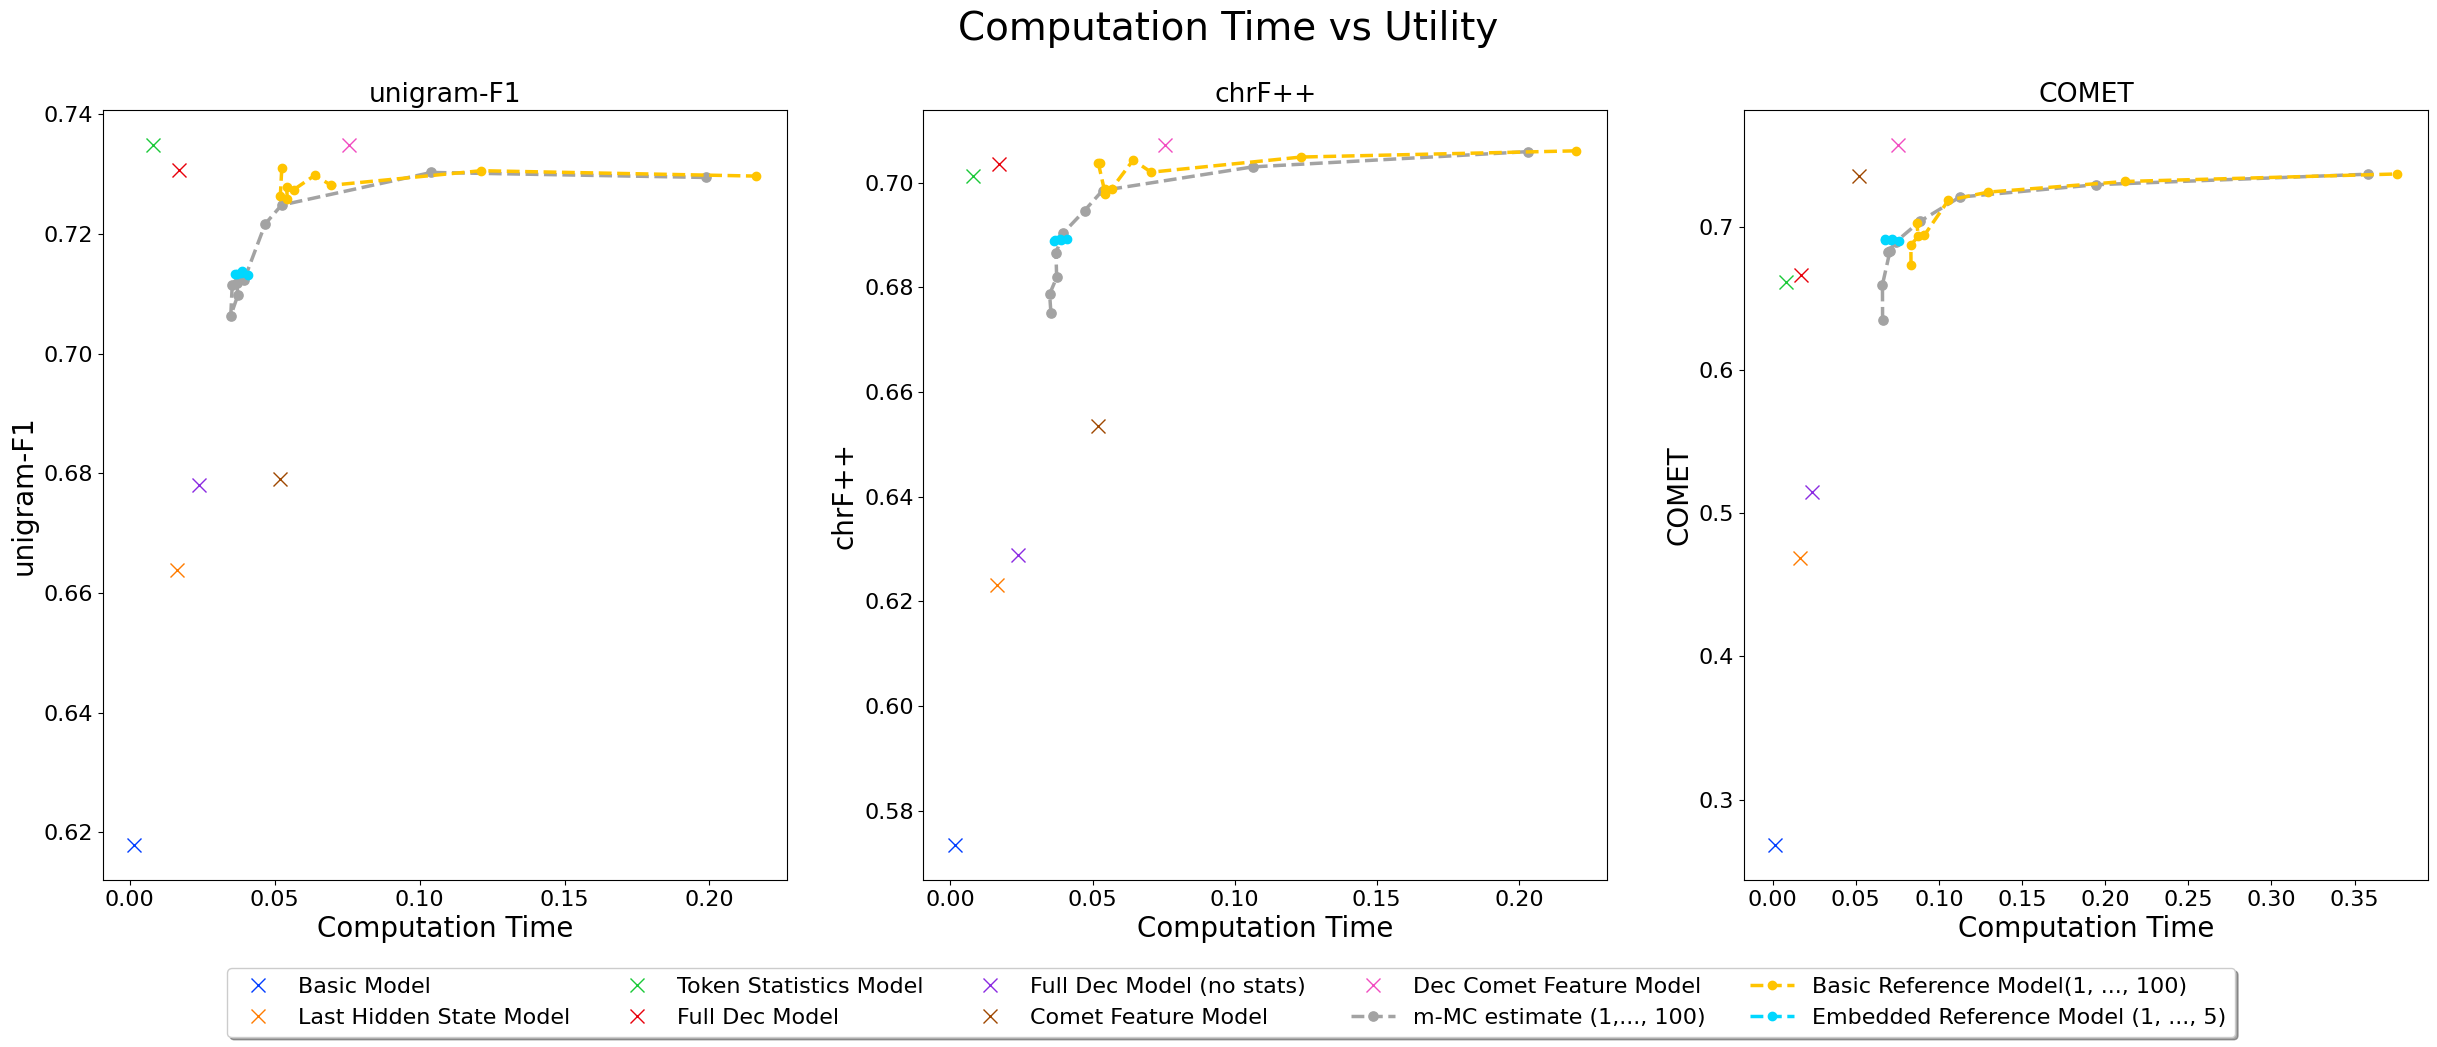

In [61]:
def time_vs_util(timing_models, mc_estimate_timing, models, sharey=False, log_scale=False):
    fig, (axs) = plt.subplots(1, 3, figsize=(30,10), sharey=sharey)
    plt.rcParams.update({'font.size': 16})
    names = [PRETTY_NAMES[name] for name in models]
   
    utilities = [
        ('unigram-f1', 'unigram-F1', 'best_unigram_f1_mean'),
        ('chrf', 'chrF++', 'best_chrf_mean'),
        ('comet', 'COMET', 'best_comet_mean'),
    ]

    
    
    lw=2.5
    markersize = 10
    for i, util in enumerate(utilities):
        ax = axs[i]
        ax.set_title(util[1])
        ax.set_ylabel(util[1] ,  size=20)
        
        if log_scale:    
            ax.set_yscale('log')
        ax.set_xlabel('Computation Time',  size=20)

        model_results = load_results_models(models, utility=util[0])
        color_palette = itertools.cycle(sns.color_palette('bright'))
        
 
        time_models = [timing_models[model] for model in models]
        
        statistic = util[2]
        statistics = [model_results[model][statistic] for model in models]
        
        for line, name, model_time, stat in zip(lines, names, time_models, statistics):
            color = next(color_palette)

            ax.plot(model_time, stat, 'x', label=name, color = color, lw=lw, markersize=markersize)
            
        # Show the mc estimates
        
        mc_results = load_result_m_mc_estimate(utility=util[0])
        
        mc_results_temp = [mc_results[m][statistic] for m in ms]
        color = next(color_palette)
           
        util_name = util[0]
        if util_name == "comet":
            util_name = "COMET"
        ax.plot(mc_estimate_timing[util_name], mc_results_temp, '--o', label='m-MC estimate (1,..., 100)', lw=lw, color=color, markersize=markersize/1.5)

        
        results_basic_reference_model = load_result_basic_ref_model_estimate(utility=util[0])
        statistics_reference_model = [r[statistic] for _, r in results_basic_reference_model.items()]

        
        result_unigram_count_model = load_result_unigram_model_estimate(utility=util[0])
        statistics_unigram_count_model = [r[statistic] for _, r in result_unigram_count_model.items()]

        
        ax.plot(basic_ref_models_timing[util_name], statistics_reference_model, '--o',  label='Basic Reference Model(1, ..., 100)', lw=lw, color=next(color_palette))
#         ax.plot([1,2,3,4,5], statistics_unigram_count_model, '--o',  label='Embedded Reference Model', lw=lw, color=next(color_palette))
        ax.plot(embed_timings[util_name], statistics_unigram_count_model, '--o',  label='Embedded Reference Model (1, ..., 5)', lw=lw, color=next(color_palette))
      
    lgd = ax.legend(loc='upper center', bbox_to_anchor=(-0.75, -.1), fancybox=True, shadow=True, ncol=5)
    fig.suptitle('Computation Time vs Utility', fontsize=28)
    plt.show()



time_vs_util(timing_models, mc_estimate_timing, models)